# Laboratorio 2 Procesamiento Digital de Senales 
## Muestreo, Cuantificacion, Señales Analogas y Digitales

### 2.1 Cargue la señal correspondiente al ultimo numero de su cedula. Con base en el numero total de muestras y a la frecuencia de muestreo, grafique la senal en funcion del tiempo

32000


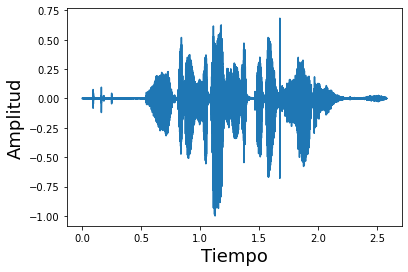

In [18]:

from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar la señal
import numpy as np
import matplotlib.pyplot as plt

file_audio= ('0.wav')
fs,x= read(file_audio)
print(fs)
x= x/float(max(abs(x)))
t= np.arange(0,float(len(x))/fs,1.0/fs)

plt.plot(t,x)
plt.xlabel('Tiempo',fontsize=18)
plt.ylabel('Amplitud',fontsize= 18)
plt.show()
Audio(x,rate=fs)

#### 2.2 Genere un nuevo archivo de audio con la misma señal pero al doble y luego con la mitad de la frecuencia de muestreo original. Escuche el audio


In [33]:
from scipy.io.wavfile import write
fm_doble = fs*2
fm_mitad = fs/2

write ('A_fm_doble.wav', fm_doble, x)
write ('A_fm_mitad.wav', int(fm_mitad), x)
file_audio2= ('A_fm_doble.wav')
fsd,xd= read(file_audio2)
file_audio3= ('A_fm_mitad.wav')
fsm,xm= read(file_audio3)
print("Frecuencias de muestreo:",fs,fsd,fsm)
print("Audio a Doble fm")
Audio(xd,rate=fsd)


Frecuencias de muestreo: 32000 64000 16000
Audio a Doble fm


In [30]:
print("Audio a la mitad fm")
Audio(xm,rate=fsm)

Audio a la mitad fm


 ¿Que diferencia nota?
 R: Los audios se notan a una velocidad de reproducion mas acelerada o lenta
 ¿A que se debe esto?
 R: La señal se acomoda a su frecuencia de muestreo, al ser la mitad se acelera y se pierde datos, al ser el doble el audio se expande, separando mas los datos de la señal.

### 2.3 Sub-muestree la senal usando un tercio de la frecuencia de muestreo original. Reproduzca la senal resultante y la original, ambas usando una frecuencia de fs/3. Grafique ambas se˜nales en la misma figura. ¿Que puede concluir?

Tip: use las siguientes instrucciones para el sub-muestreo:

Frecuencias de muestreo: 32000 10666.666666666666


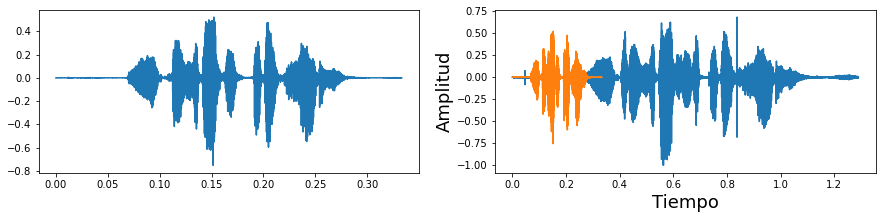

In [38]:
from scipy . signal import resample

fs_sub= fs/3
Señal_Sm = resample(x, int(fs_sub))

t2= np.arange(0,float(len(Señal_Sm))/fs,1.0/fs)

print("Frecuencias de muestreo:",fs,fs_sub)

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(t2,Señal_Sm)
plt.subplot(1,2,2)
plt.plot(t,x)
plt.plot(t2,Señal_Sm)
plt.xlabel('Tiempo',fontsize=18)
plt.ylabel('Amplitud',fontsize= 18)
plt.show()

¿Que puede concluir?
R: La señal sub muestrada graficamente se ve similar a la original, pero realmente tenemos que la señal sub tiene una gran perdida de datos, ya que al muestrearla mas rapido de lo normal se omite imformacion en el acomodo de la inf.

### 3. Frecuencia de Nyquist y Aliasing

#### 1. Genere una señal sinusoidal con una frecuencia de 4 Hz y una frecuencia de muestreo de 80 Hz. Genere otra señal sinusoidal de frecuencia 4 Hz y muestreela segun el teorema de Nyquist. Grafique señales en la misma figura. ¿Es posible recuperar la señal a partir de esta reconstruccion?

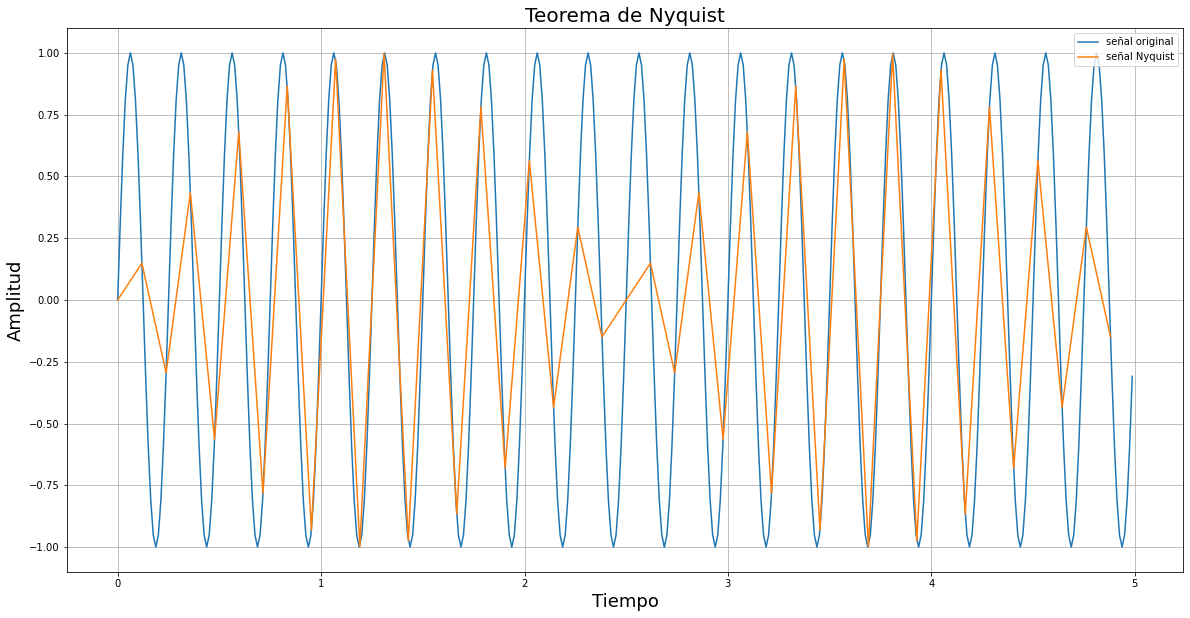

In [59]:
#definimos la frecuencia de la señal.
f = 4
fm = 80
fn = f*2.1    #mayor o igual
#Amplitud
A=1

#Número de periodos 
nper=5

#inicialmente creamos un vector para la ventana de la grafica.

t = np.arange(0,nper,1.0/fm)
t2 = np.arange(0,nper,1.0/fn)

#Definimos ahora la señal
señal1 = A*np.sin(2*np.pi*f*t)
señal2 = A*np.sin(2*np.pi*f*t2)

#grafica
plt.figure(figsize=(20,10))
plt.title("Teorema de Nyquist",fontsize=20)
plt.plot(t,señal1, label="señal original")
plt.plot(t2,señal2, label="señal Nyquist")
plt.xlabel('Tiempo',fontsize=18)
plt.ylabel('Amplitud',fontsize= 18)
plt.legend()
plt.grid()
plt.show()

¿Es posible recuperar la señal a partir de esta reconstruccion?
Si la frecuencia de Nyquist es mayor al doble de la f de la señal, es posible reconstruirla, si es igual a el doble, no es posible.

#### 2. Escriba un codigo que genere dos senales sinusoidales muestreadas con una frecuencia fs = ((n + 1) ∗ 11) − n Hz. La senal 1 tendra una frecuencia f1 = n + 1 Hz y la senal 2 tendra una frecuencia f2 = (n + 1) ∗ 11 Hz. Tome n como ultimo dıgito de su cedula). ¿Ambas senales quedan bien representadas. ¿ A que se debe esto?.

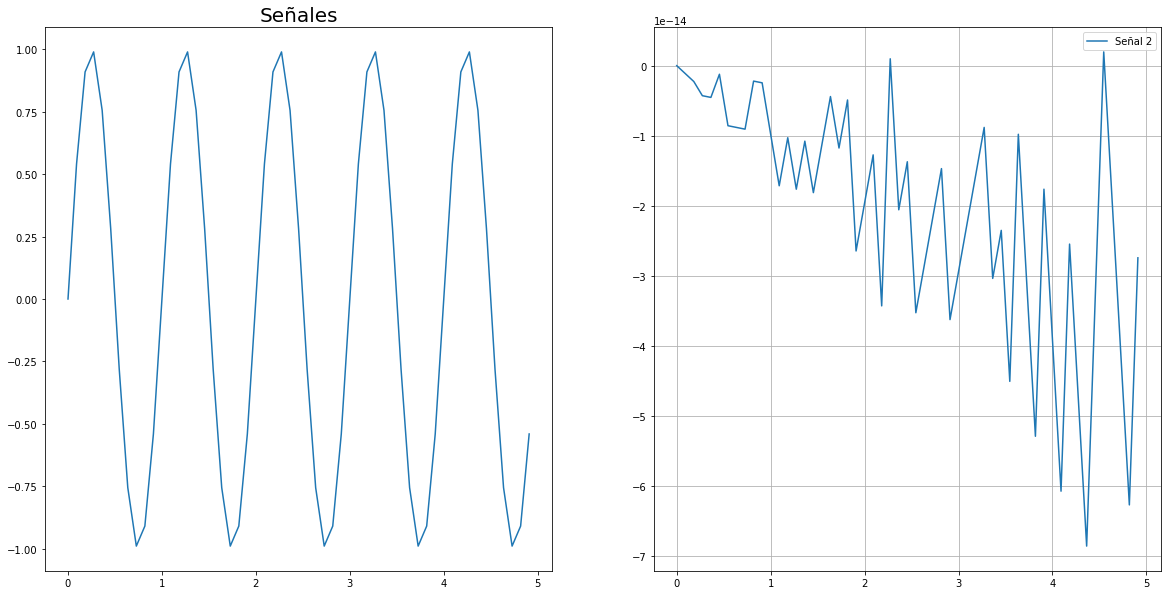

In [63]:
#definimos la frecuencia de la señal.
n = 0
fs = ((n + 1)*11)-n
f1 = n+1
f2 = (n + 1)*11

#Amplitud
A=1

#Número de periodos 
nper=5

#inicialmente creamos un vector para la ventana de la grafica.

t = np.arange(0,nper,1.0/fs)

#Definimos ahora la señal
señal1 = A*np.sin(2*np.pi*f1*t)
señal2 = A*np.sin(2*np.pi*f2*t)

#grafica
plt.figure(figsize=(20,10))
plt.xlabel('Tiempo',fontsize=18)
plt.ylabel('Amplitud',fontsize= 18)
plt.subplot(1,2,1)
plt.title("Señales",fontsize=20)
plt.plot(t,señal1, label="Señal 1")
plt.subplot(1,2,2)
plt.plot(t,señal2, label="Señal 2")
plt.legend()
plt.grid()
plt.show()


¿Ambas senales quedan bien representadas. ¿A que se debe esto?
Solo la primera señal es posible de reconocer, ya que cumple el teorema de Nyquist, la seguna no es posible de reconocer ya que no cumple con el teoreama de Nyquist y sucede el fenomeno de aliasing y puede dar origen a patrones de bordes dentados

#### 4. Cuantificacion

1. Use la funcion mostrada a continuacion para Re-cuantizar la senal de audio utilizada en los numerales anteriores a 2, 4 y 12 bits. Escuche y grafique las senales re-cuantificadas. Compare graficamente las senales re-cuantificadas con la se˜nal original. ¿Que pudo notar?

32000


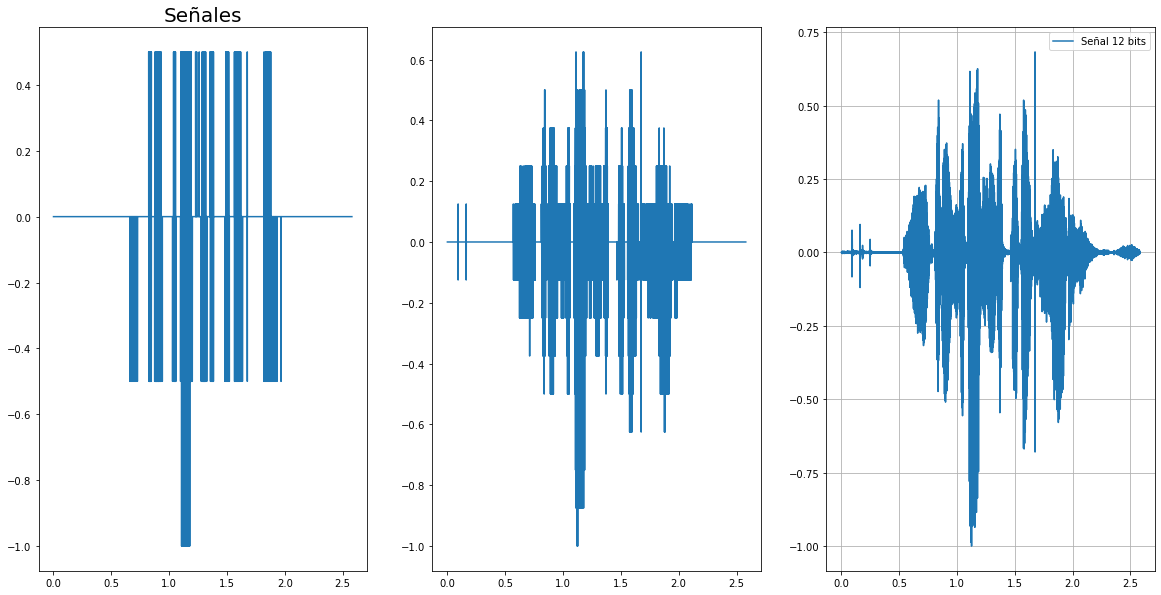

In [68]:
def fxquant (s , bit ) :
# s: senal de entrada , debe estar normalizada entre -1 y 1
# bit: bits de cuantizacion
    Plus1 = np.power(2,(bit-1))
    X = s * Plus1
    X = np.round(X)
    X = np.minimum(Plus1-1.0,X)
    X = np.maximum(-1.0* Plus1,X)
    X = X / Plus1
    return X

file_audio= ('0.wav')
fs,x= read(file_audio)
print(fs)
x= x/float(max(abs(x)))
tc= np.arange(0,float(len(x))/fs,1.0/fs)

x2 = fxquant(x,2)
x4 = fxquant(x,4)
x12 = fxquant(x,12)

#grafica
plt.figure(figsize=(20,10))
plt.xlabel('Tiempo',fontsize=18)
plt.ylabel('Amplitud',fontsize= 18)
plt.subplot(1,3,1)
plt.title("Señales",fontsize=20)
plt.plot(tc,x2, label="Señal 2 bits")
plt.subplot(1,3,2)
plt.plot(tc,x4, label="Señal 4 bits")
plt.subplot(1,3,3)
plt.plot(tc,x12, label="Señal 12 bits")
plt.legend()
plt.grid()
plt.show()

¿Que pudo notar?
R: entre mas alto el nivel de cuantizacion, es posible recuperar mas informacion de la señal entregada, ya que tendra una mejor relacion señal a ruido